In [1]:
import os.path as osp

import numpy as np

from nuscenes.utils.data_classes import RadarPointCloud
from pyquaternion import Quaternion

from nuscenes.utils.geometry_utils import view_points

from PIL import Image
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
from nuscenes.nuscenes import NuScenes

In [3]:
nusc = NuScenes(version='v1.0-mini', dataroot='/Users/curt/projects/avs/nuscenes-data/v1.0-mini', verbose=True)

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.5 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


In [4]:
my_sample = nusc.sample[20]
my_sample

{'token': 'c844bf5a9f2243ff8f4bf2c85fe218ff',
 'timestamp': 1532402937698000,
 'prev': 'b26e791522294bec90f86fd72226e35c',
 'next': 'fedfb3a6cb804635a0f47143f9ca8d6f',
 'scene_token': 'cc8c0bf57f984915a77078b10eb33198',
 'data': {'RADAR_FRONT': 'e0f3cb9fbae54181945426deed69b4f6',
  'RADAR_FRONT_LEFT': 'a3089ec8a1474912b0036efabf5de2c8',
  'RADAR_FRONT_RIGHT': 'c594463c47074c36acde042dd5a70589',
  'RADAR_BACK_LEFT': 'c721fd748a8c42a7895b1c46f2861689',
  'RADAR_BACK_RIGHT': 'dcb7048f5d07482d8404e904db0fe3ce',
  'LIDAR_TOP': 'e28319b88b634a2d9eff6fdfa7db5500',
  'CAM_FRONT': '06c1523315b14aa7a0dfa4afacafb9e6',
  'CAM_FRONT_RIGHT': '3506e20ade194650955df2c57a69dc21',
  'CAM_BACK_RIGHT': '5e7fa7c26fc04a6fa3358d6dc1e58786',
  'CAM_BACK': '02baa363c8654cf596d30ffce14f5b41',
  'CAM_BACK_LEFT': 'c70904cec6824a4c99bf48ff7973dffb',
  'CAM_FRONT_LEFT': '2a6f34470d6e42808e4eb8e67eedf6a2'},
 'anns': ['f503fa3d050f43cca4af2241b674929a',
  '9593327bd1e64f7da125da9c166f70d4',
  'd37a4132d66f4eec99af9d5

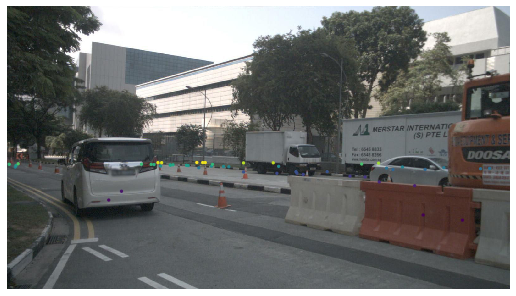

In [5]:
nusc.render_pointcloud_in_image(my_sample['token'], pointsensor_channel='RADAR_FRONT', camera_channel='CAM_FRONT')

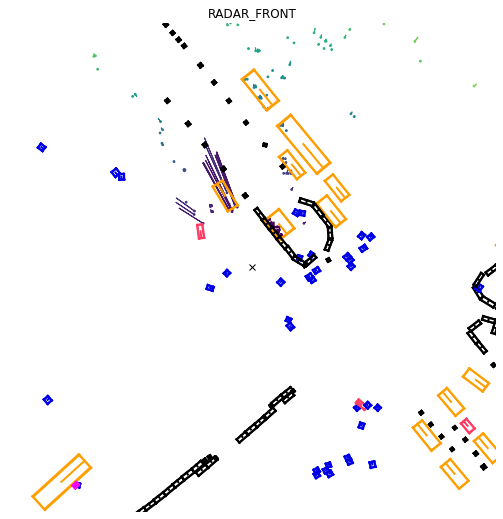

In [6]:
nusc.render_sample_data(my_sample['data']['RADAR_FRONT'], nsweeps=5)

In [7]:
pointsensor_token = my_sample['data']['RADAR_FRONT']
camera_token = my_sample['data']['CAM_FRONT']

In [8]:
cam = nusc.get('sample_data', camera_token)
pointsensor = nusc.get('sample_data', pointsensor_token)

In [9]:
pcl_path = osp.join(nusc.dataroot, pointsensor['filename'])
pcl_path

'/Users/curt/projects/avs/nuscenes-data/v1.0-mini/samples/RADAR_FRONT/n015-2018-07-24-11-22-45+0800__RADAR_FRONT__1532402937702954.pcd'

In [10]:
pc = RadarPointCloud.from_file(pcl_path)
pc

In [11]:
cs_record = nusc.get('calibrated_sensor', pointsensor['calibrated_sensor_token'])
print(cs_record)

{'token': 'f4d2a6c281f34a7eb8bb033d82321f79', 'sensor_token': '47fcd48f71d75e0da5c8c1704a9bfe0a', 'translation': [3.412, 0.0, 0.5], 'rotation': [0.9999984769132877, 0.0, 0.0, 0.0017453283658983088], 'camera_intrinsic': []}


In [12]:
pc.rotate(Quaternion(cs_record['rotation']).rotation_matrix)
pc.translate(np.array(cs_record['translation']))

In [13]:
poserecord = nusc.get('ego_pose', pointsensor['ego_pose_token'])
poserecord

{'token': 'e0f3cb9fbae54181945426deed69b4f6',
 'timestamp': 1532402937702954,
 'rotation': [0.857008282013058,
  -0.0179708883524041,
  0.01085020308993987,
  -0.5148748632685026],
 'translation': [398.7709616315375, 1119.1078673285288, 0.0]}

In [14]:
pc.rotate(Quaternion(poserecord['rotation']).rotation_matrix)
pc.translate(np.array(poserecord['translation']))

In [15]:
cam_poserecord = nusc.get('ego_pose', cam['ego_pose_token'])
cam_poserecord

{'token': '06c1523315b14aa7a0dfa4afacafb9e6',
 'timestamp': 1532402937662460,
 'rotation': [0.854578042803818,
  -0.017705058447158726,
  0.010625386818204168,
  -0.5189123247890167],
 'translation': [398.6897750668075, 1119.2628933692704, 0.0]}

In [16]:
pc.translate(-np.array(cam_poserecord['translation']))
pc.rotate(Quaternion(cam_poserecord['rotation']).rotation_matrix.T)

In [17]:
cam_cs_record = nusc.get('calibrated_sensor', cam['calibrated_sensor_token'])
cam_cs_record

{'token': '1d31c729b073425e8e0202c5c6e66ee1',
 'sensor_token': '725903f5b62f56118f4094b46a4470d8',
 'translation': [1.70079118954, 0.0159456324149, 1.51095763913],
 'rotation': [0.4998015430569128,
  -0.5030316162024876,
  0.4997798114386805,
  -0.49737083824542755],
 'camera_intrinsic': [[1266.417203046554, 0.0, 816.2670197447984],
  [0.0, 1266.417203046554, 491.50706579294757],
  [0.0, 0.0, 1.0]]}

In [18]:
pc.translate(-np.array(cam_cs_record['translation']))
pc.rotate(Quaternion(cam_cs_record['rotation']).rotation_matrix.T)

In [19]:
depths = pc.points[2, :]

# Retrieve the color from the depth.
coloring = depths

In [20]:
print(pc.points.shape)
print(pc.points[:3, :].shape)
pc.points[:3, :]

(18, 58)
(3, 58)


array([[  4.26956799,   3.66379882,   3.25947064,   2.8551427 ,
         -3.76348521,  -6.76196034,  -4.38227002,   5.6001143 ,
          4.98277592, -11.00378957, -12.81386596,   5.54949797,
          4.94228285,   2.52354539,   0.91057157,   2.30764257,
         -1.50961218,   2.48594467,   4.88588177,  11.84375993,
         15.03933753,  12.80757925,  -7.00491879,  21.42326274,
         23.01454228,  19.79148823,  -4.24548536,  16.56409368,
         -5.05703362,   1.93699837,  -6.87289471, -13.67560945,
        -29.03037569, -10.70171915, -11.3161647 , -14.13055349,
        -14.33488662, -14.34934844, -34.89963997, -17.96516268,
        -37.50101661,  -8.78854233, -19.38971078, -21.60266961,
         17.9803872 , -43.99196018, -46.64106085,  25.08041321,
         -4.54629107,   2.24051571, -57.82052217, -54.67845233,
        -24.38192849, -15.00242023, -14.40388176, -25.59057303,
        -16.81828138, -58.51161823],
       [  0.98202765,   0.97739986,   0.97393282,   0.97046579,
   

In [21]:
cam_cs_record['camera_intrinsic']

[[1266.417203046554, 0.0, 816.2670197447984],
 [0.0, 1266.417203046554, 491.50706579294757],
 [0.0, 0.0, 1.0]]

In [22]:
points = view_points(pc.points[:3, :], np.array(cam_cs_record['camera_intrinsic']), normalize=True)

In [23]:
min_dist = 1.0
im = Image.open(osp.join(nusc.dataroot, cam['filename']))

In [24]:
# Remove points that are either outside or behind the camera. Leave a margin of 1 pixel for aesthetic reasons.
# Also make sure points are at least 1m in front of the camera to avoid seeing the lidar points on the camera
# casing for non-keyframes which are slightly out of sync.
mask = np.ones(depths.shape[0], dtype=bool)
mask = np.logical_and(mask, depths > min_dist)
mask = np.logical_and(mask, points[0, :] > 1)
mask = np.logical_and(mask, points[0, :] < im.size[0] - 1)
mask = np.logical_and(mask, points[1, :] > 1)
mask = np.logical_and(mask, points[1, :] < im.size[1] - 1)
points = points[:, mask]
coloring = coloring[mask]

In [26]:
coloring

array([  6.51541606,   7.11249786,   9.66465997,  12.2602099 ,
        14.73242297,  17.1279816 ,  21.73212419,  22.72774277,
        25.31027702,  27.09863125,  27.50873789,  29.88115585,
        30.51005654,  30.52741205,  36.37778665,  37.00090027,
        41.38480538,  43.04154511,  39.24708879,  40.45860882,
        43.63532895,  48.66155341,  47.41202964,  50.25570245,
        51.10628788,  52.44258917,  52.79339974,  46.48229827,
        56.41493943,  58.41051546,  60.39018228,  60.98871275,
        62.98862766,  56.03994964,  65.16250155,  68.42889179,
        68.55223438,  70.336244  ,  72.82252082,  68.77431732,
        75.55522926,  86.67399563,  90.25978575,  92.10887853,
        95.11639009,  97.98424212,  98.18857707,  96.30765824,
       100.17113646])

(-80.95090735986899, 1599.5, 899.5, -0.5)

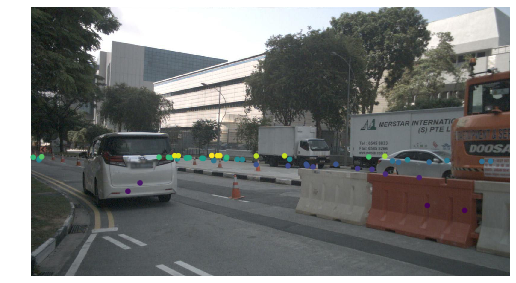

In [27]:
dot_size = 20
plt.figure(figsize=(9, 16))
plt.imshow(im)
plt.scatter(points[0, :], points[1, :], c=coloring, s=dot_size)
plt.axis('off')